### Now under the driven Rabi oscillations how the system evolves 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.linalg as lg
from scipy.optimize import curve_fit
from definations import *

In [10]:
def QMCWF2(U,L,psi_0i,step):
    
    psi_f = psi_0i
    psi_n = psi_0i
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0i[0,0])**2
    prob_e[0] = abs(psi_0i[1,0])**2
    for t in range(step):
        size = np.dot(np.dot(psi_0i.conj().T,U_dagger),np.dot(U,psi_0i))
        jump_prob = 1.0 - float(size[0,0])
        #print(size)
        epsilon = random.rand()
        if epsilon > jump_prob:
            psi_f = np.dot(U,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            #print(psi_n)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0i = psi_n
        else :
            psi_f = np.dot(L,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            psi_0i = psi_n
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            prob_g[t+2:step+2] = 1
    return prob_g,prob_e

In [11]:
dt = 0.0001
t = 4.0000
step = int(t/dt)
fns = 100
hbar = 1 
gamma = 2
omega = 6
w_t = 1.0 * 2 * np.pi
nth = 0.63
tlist = np.arange(0,4.0001,dt)
print(tlist.shape)
print(step)

(40001,)
40000


In [14]:
H1 = np.array([[0,0],[0,-1j*hbar*gamma/2]])
H2 = hbar*omega/2*(adagger(1)+a(1))
H = H1 - H2 
#print(H)
U2 = np.eye(2) - 1j*(1/hbar)*dt*H
L2 = np.array([[0,2*np.sqrt(gamma)],[0,0]],dtype = complex)

psi_0 = np.array([[1],[0]])
U_dagger = U2.conj().T

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


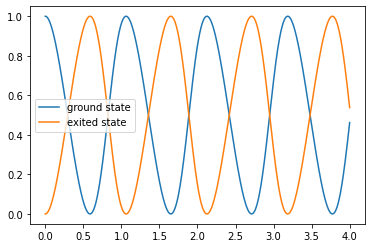

In [15]:
ground_prob,exited_prob = QMCWF2(U2,L2,psi_0,step)
plt.plot(tlist,ground_prob,label = "ground state")
plt.plot(tlist,exited_prob, label = "exited state")
plt.legend()

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[0.99999991 0.99999991 0.99999991 0.99999991 0.99999991 0.99999991
 0.99999991 0.99999991 0.99999991 0.99999991 0.99999991 0.99999991
 0.99999991 0.99999991 0.99999991 0.99999991 0.99999991 0.99999991
 0.99999991 0.99999991]
[8.99999919e-08 8.99999919e-08 8.99999919e-08 8.99999919e-08
 8.99999919e-08 8.99999919e-08 8.99999919e-08 8.99999919e-08
 8.99999919e-08 8.99999919e-08 8.99999919e-08 8.99999919e-08
 8.99999919e-08 8.99999919e-08 8.99999919e-08 8.99999919e-08
 8.99999919e-08 8.99999919e-08 8.99999919e-08 8.99999919e-08]


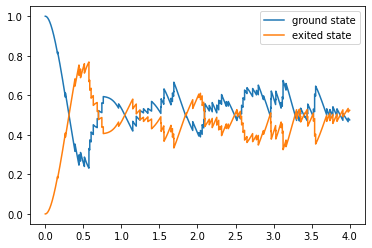

In [16]:
# number of iterations
N_iter = 20

ground_prob = np.zeros((N_iter,step+1))
exited_prob = np.zeros((N_iter,step+1))
for i in range(N_iter):
    ground_prob[i,:],exited_prob[i,:] = QMCWF2(U2,L2,psi_0,step)

ground_avg = np.zeros(step+1)
exited_avg = np.zeros(step+1)

print( ground_prob[:,1])
print(exited_prob[:,1])
for i in range(step+1):
    ground_avg[i] = np.sum(ground_prob[:,i])/N_iter
    exited_avg[i] = np.sum(exited_prob[:,i])/N_iter
    

plt.plot(tlist,ground_avg,label = "ground state")
plt.plot(tlist,exited_avg, label = "exited state")
plt.legend()

(0.0, 1.0)

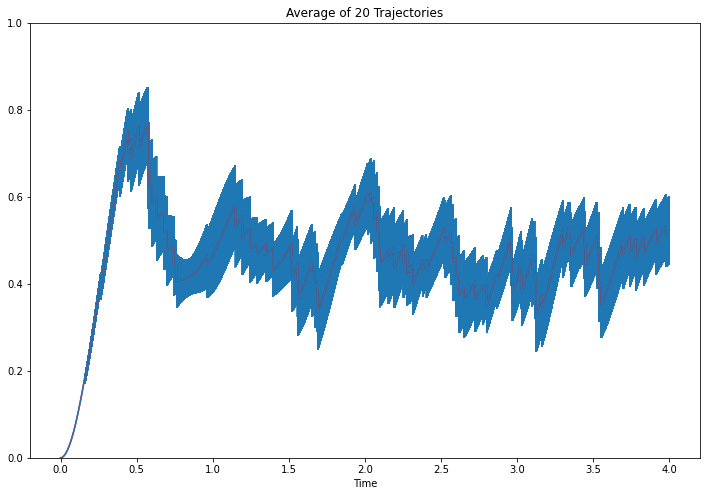

In [19]:
uncertainty = np.std(exited_prob, 0)/np.sqrt(N_iter)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 8))
ax.errorbar(tlist, np.mean(exited_prob, 0), uncertainty)
ax.plot(tlist, np.mean(exited_prob, 0), 'r')  # Center line plotted in red for clarity
ax.set_title("Average of %i Trajectories" % N_iter)
ax.set_xlabel("Time")
ax.set_ylim(0, 1)